In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
#import matplotlib as mpl
from scipy import optimize as scop
import pyCardiac as pc
#plt.style.use('seaborn')
import itertools
plt.style.use('../../../Documents/nico_general.mplstyle')

In [2]:
t = np.arange(0,10,5e-5)
v_list = np.arange(-80,16,5)
count = 0
while count<=39:
    v_list = np.insert(v_list,count,-80)
    count+=2
v = []
count = 0
start = 0
R = 500e6
C=11e-11
for k in range(len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        #print(v_0, V_m)
        v.append((v_0 - V_m)*np.exp(-(t[k]-start)/(R*C)) + V_m)
        if k%10000==0:
            count+=1
            start = t[k]
            #print(start)
            
        

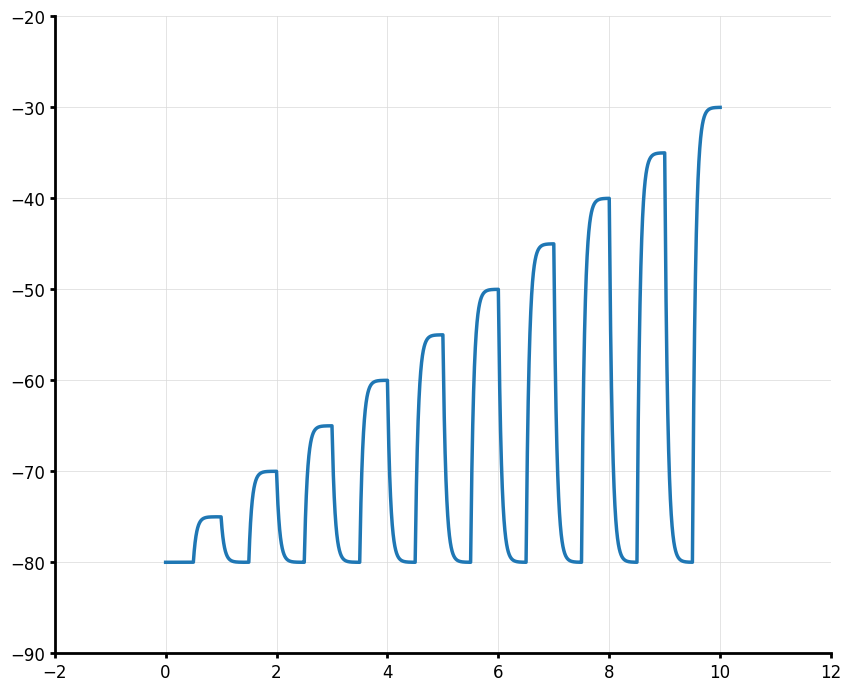

In [3]:
plt.plot(t[1:],v[1:])
#plt.plot(t[1:],v_n)


In [4]:
#plt.plot(v)
time = []
for k in range(0,78):
    time.append(t[k])
for k in range(0,1000):
    time.append(t[k])
for k in range(0,1000):
    time.append(t[k])
for k in range(0,2000):
    time.append(t[k])
for k in range(0,922):
    time.append(t[k])


0.0012000000000000001 0.00058


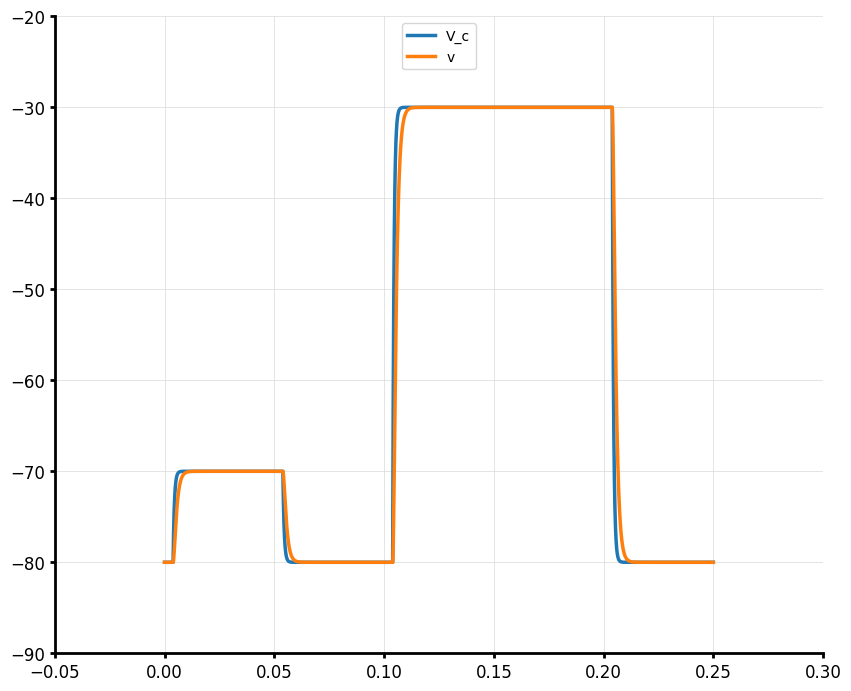

In [5]:
R_f = 50e6
C_f = 11.6e-12
R  =  100e6
C = 12e-12
    

v_list = np.array([-80,-80,-70,-80,-30,-80])
v = []
v1 = []
v_c_f = []
count = 0
start = 0
v_c_f.append(-80)
v.append(-80)
#v1.append(-80)
for k in range(1,len(time)):
    v_0 = v_list[count]
    V_m = v_list[count+1]
    #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
    v_c_f.append((v_0 - V_m)*np.exp(-time[k]/(R_f*C_f)) + V_m)
    v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
    if k==77:
        count=1
    if k==1077:
        count=2
    if k==2077:
        count=3
    if k==4077:
        count=4
t_for_graph = np.arange(0, len(time)*5e-5,5e-5)        
#v = np.array(v) 
plt.plot(t_for_graph,v_c_f, label = 'V_c')
#plt.plot(np.diff(v_c)*R*C/np.diff(t_for_graph))
plt.plot(t_for_graph,v, label = 'v')
#plt.plot(t_for_graph,v1, label = 'v1')
plt.legend()
print(R*C, R_f*C_f)


In [18]:
#ломать-не строить
def full_log(t,C_p, C_m,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max,g_leak):#, V_m):
    
    
    params = [C_p,C_m ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max, g_leak]#, V_m]
    
    C_p = np.exp(C_p)#,dtype=np.float128)
    C_m = np.exp(C_m)#,dtype=np.float128)
    
    #V_m = np.exp(V_m)
    
    a0_m = np.exp(a0_m)#,dtype=np.float128)
    b0_m = np.exp(b0_m)#,dtype=np.float128)
    
    delta_m = np.exp(delta_m,dtype=np.float128)
    s_m = np.exp(s_m,dtype=np.float128)
    
    a0_h = np.exp(a0_h)#,dtype=np.float128)
    b0_h = np.exp(b0_h)#,dtype=np.float128)
    
    delta_h = np.exp(delta_h)#,dtype=np.float128)
    s_h = np.exp(s_h)#,dtype=np.float128) 
    
    R_m = np.exp(R_m)#,dtype=np.float128)
    R_p = np.exp(R_p)#,dtype=np.float128)
    
    g_max = np.exp(g_max)#,dtype=np.float128)
    g_leak = np.exp(g_leak)#,dtype=np.float128)

    params = [C_p,C_m ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max, g_leak]#, V_m]
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
  
    t_step = 5e-5
    v_list = np.array([-80,-80,-70,-80,-10,-10,-80])
    
    v = [-80]
    v_p = [-80]
    
    count = 0
    start = 0

    for k in range(1,len(t)):
        #v_0 = v_list[count]
        
        V_m = v_list[count+1]
        
        v_p.append(V_m+(v_p[k-1] - V_m)*np.exp(-t_step/(R_p*C_p)))
        v.append(v[k-1]+(v_p[k-1]-v[k-1])*5e-5/(R_m*C_m))
        if (k-77)%1000 ==0:
            count+=1
    
    
    v_p = np.array(v_p)    
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    #v_const = -80
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    #m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    #h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m=[0]
    h = [1]

    for k in range(1,len(t)):
        
        #const
        #m.append(m[k-1]+t_step*(alfa_m[k-1]*(1-m[k-1])-betta_m[k-1]*m[k-1]))
        #h.append(h[k-1]+t_step*(alfa_h[k-1]*(1-h[k-1])-betta_h[k-1]*h[k-1]))
        
        #Euler
        #m.append(m[k-1] + (m_inf[k-1] - m[k-1])*t_step/tau_m[k-1])
        #h.append(h[k-1] + (h_inf[k-1] - h[k-1])*t_step/tau_h[k-1])
        
        #Rush-Larsen
        m.append(m_inf[k-1] + (m[k-1] - m_inf[k-1])*np.exp(-t_step/tau_m[k-1]))
        h.append(h_inf[k-1] + (h[k-1] - h_inf[k-1])*np.exp(-t_step/tau_h[k-1])) 
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')
    m = np.array(m)
    h = np.array(h)
  
    


    v_rev = 18
    
    i_c= []
    i_p= []
    for l in range(1,len(v)):
        i_c.append(1e9*C_m*(v[l]-v[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        i_p.append(1e9*C_p*(v_p[l]-v_p[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    #i_c = np.diff(v)*1e-9*C_m/5e-5
    i_c.append(i_c[-1])
    i_p.append(i_p[-1])
    i_leak = g_leak*(v)
    


    tau_z = 1e-12*5e8
    I_in =  g_max*h*(m**3)*(v-v_rev) + i_p + i_c + i_leak
    I_out = [I_in[0]]
    
    
    #plt.plot(I_in,label = 'IIN')
    #plt.legend()
    
    for k in range(1,len(t)):
        I_out.append(I_out[k-1]+(I_in[k-1]-I_out[k-1])*5e-5/tau_z)
        
    if False:
        
        plt.figure()    
        plt.plot(t_for_graph, v_p, label = 'v_p')
        plt.plot(t_for_graph,v, label = 'v')
        plt.legend()

        plt.figure() 
        plt.plot(v, tau_m, label = 'tau_m')
        plt.plot(v, tau_h, label = 'tau_h')
        plt.legend()

        plt.figure() 
        plt.plot(v,m_inf, label = 'm_inf')
        plt.plot(v,h_inf, label = 'h_inf')
        plt.legend()
        
        plt.figure()
        plt.plot(i_c, label = 'Ic')
        plt.plot(i_p, label = 'Ip')
        plt.plot(i_leak, label = 'Ileak')
        plt.plot(g_max*h*(m**3)*(v-v_rev), label = 'Ina')
        plt.legend()
    
    plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak'],params,s = 100, color = 'orange')
    
        
    return I_out

    


In [7]:
#ломать-не строить

def full_log_fit(x0):#, V_m):
    data = ff#data2020_1219_0035[10]
    t = np.load('../data/time.npy')

    C_p = np.exp(x0[0])#,dtype=np.float128)
    C_m = np.exp(x0[1])#,dtype=np.float128)
    
    a0_m = np.exp(x0[2])#,dtype=np.float128)
    b0_m = np.exp(x0[3])#,dtype=np.float128)
    
    delta_m = np.exp(x0[4])#,dtype=np.float128)
    s_m = np.exp(x0[5])#,dtype=np.float128)
    
    a0_h = np.exp(x0[6])#,dtype=np.float128)
    b0_h = np.exp(x0[7])#,dtype=np.float128)
    
    delta_h = np.exp(x0[8])#,dtype=np.float128)
    s_h = np.exp(x0[9])#,dtype=np.float128) 
    
    R_m = np.exp(x0[10])#,dtype=np.float128)
    R_p = np.exp(x0[11])#,dtype=np.float128)
    
    g_max = np.exp(x0[12])#,dtype = np.float128)
    g_leak = np.exp(x0[13])#,dtype = np.float128)    
    
    params = [C_p,C_m ,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R_m,R_p, g_max, g_leak]#, V_m]
    
    #t = np.arange(0, len(data)*5e-5,5e-5)
  
    t_step = 5e-5
    v_list = np.array([-80,-80,-70,-80,-10,-10,-80])
    
    v = [-80]
    v_p = [-80]
    
    count = 0
    start = 0

    for k in range(1,len(t)):
        #v_0 = v_list[count]
        
        V_m = v_list[count+1]
        
        v_p.append(V_m+(v_p[k-1] - V_m)*np.exp(-t_step/(R_p*C_p)))
        v.append(v[k-1]+(v_p[k-1]-v[k-1])*5e-5/(R_m*C_m))
        if (k-77)%1000 ==0:
            count+=1
    
    
    v_p = np.array(v_p)    
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    #v_const = -80
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    #m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    #h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m=[0]
    h = [1]

    for k in range(1,len(t)):
        
        #const
        #m.append(m[k-1]+t_step*(alfa_m[k-1]*(1-m[k-1])-betta_m[k-1]*m[k-1]))
        #h.append(h[k-1]+t_step*(alfa_h[k-1]*(1-h[k-1])-betta_h[k-1]*h[k-1]))
        
        #Euler
        #m.append(m[k-1] + (m_inf[k-1] - m[k-1])*t_step/tau_m[k-1])
        #h.append(h[k-1] + (h_inf[k-1] - h[k-1])*t_step/tau_h[k-1])
        
        #Rush-Larsen
        m.append(m_inf[k-1] + (m[k-1] - m_inf[k-1])*np.exp(-t_step/tau_m[k-1]))
        h.append(h_inf[k-1] + (h[k-1] - h_inf[k-1])*np.exp(-t_step/tau_h[k-1])) 
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')
    m = np.array(m)
    h = np.array(h)
  

    v_rev = 18
    
    i_c= []
    i_p= []
    for l in range(1,len(v)):
        i_c.append(1e9*C_m*(v[l]-v[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
        i_p.append(1e9*C_p*(v_p[l]-v_p[l-1])/5e-5)#(t_for_graph[l]-t_for_graph[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    #i_c = np.diff(v)*1e-9*C_m/5e-5
    i_c.append(i_c[-1])
    i_p.append(i_p[-1])
    i_leak = g_leak*(v)
    
    #plt.plot(i_c, label = 'Ic')
    #plt.plot(i_p, label = 'Ip')
    #plt.plot(i_leak, label = 'Ileak')
    #plt.plot(g_max*h*(m**3)*(v-v_rev), label = 'Ina')

    #plt.figure()
    #plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    #return g_max*h*(m**3)*(v-v_rev) + i_p + i_c + i_leak
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)
    tau_z = 1e-12*5e8
    I_in =  g_max*h*(m**3)*(v-v_rev) + i_p + i_c + i_leak
    I_out = [I_in[0]]
    
    
    #plt.plot(I_in,label = 'IIN')
    #plt.legend()
    
    for k in range(1,len(t)):
        I_out.append(I_out[k-1]+(I_in[k-1]-I_out[k-1])*5e-5/tau_z)
    #return I_out

    return sum((I_out-data)**2)



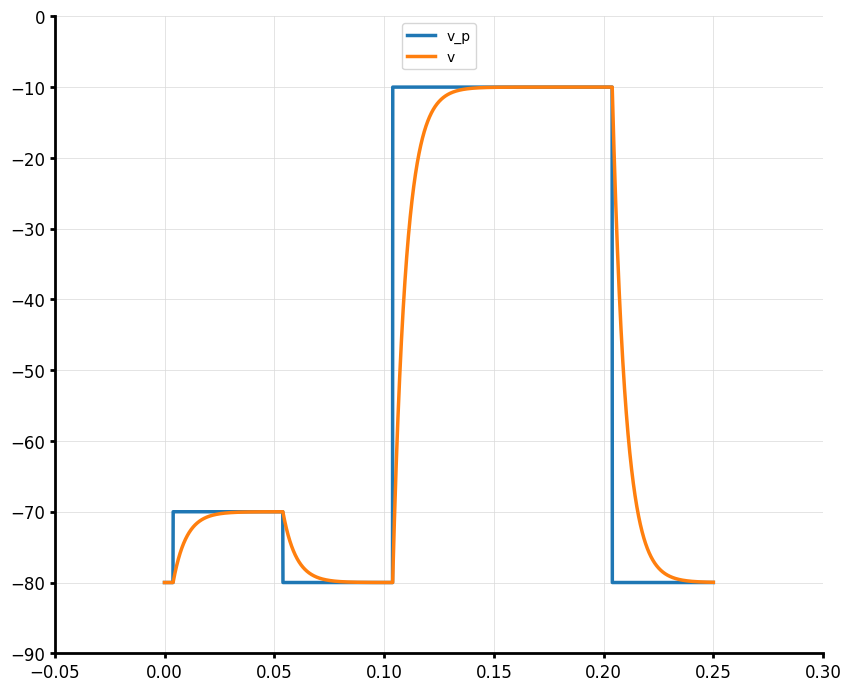

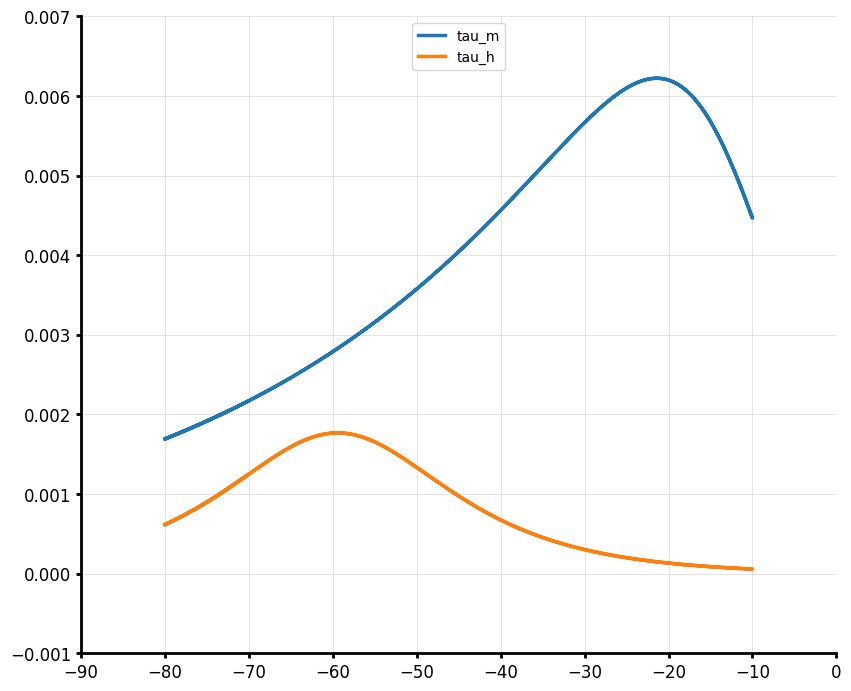

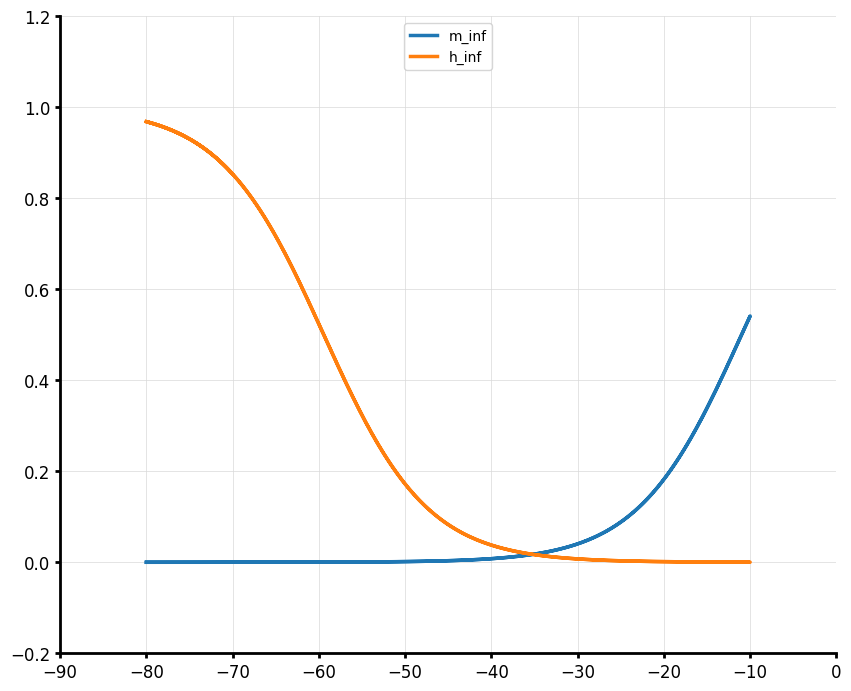

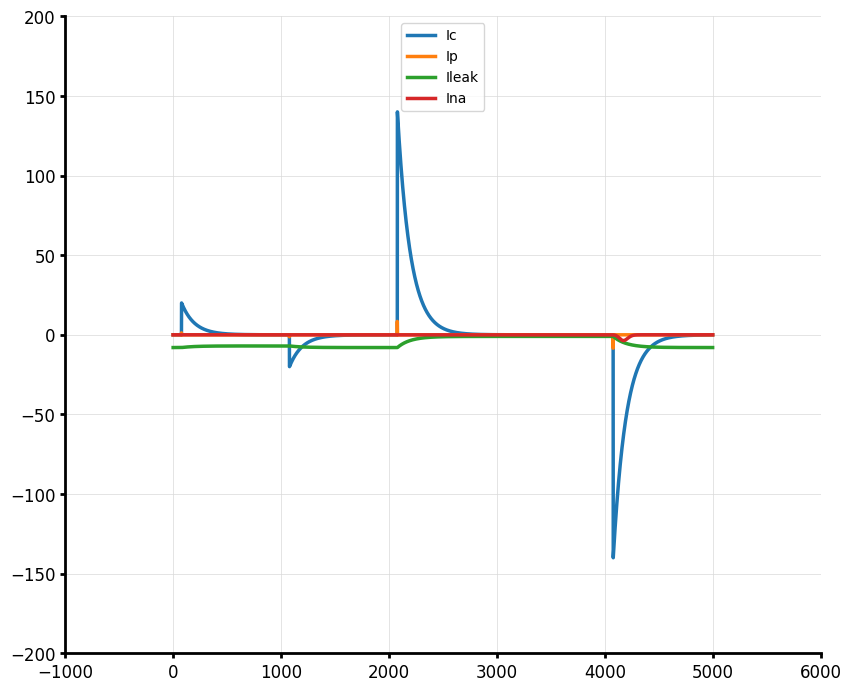

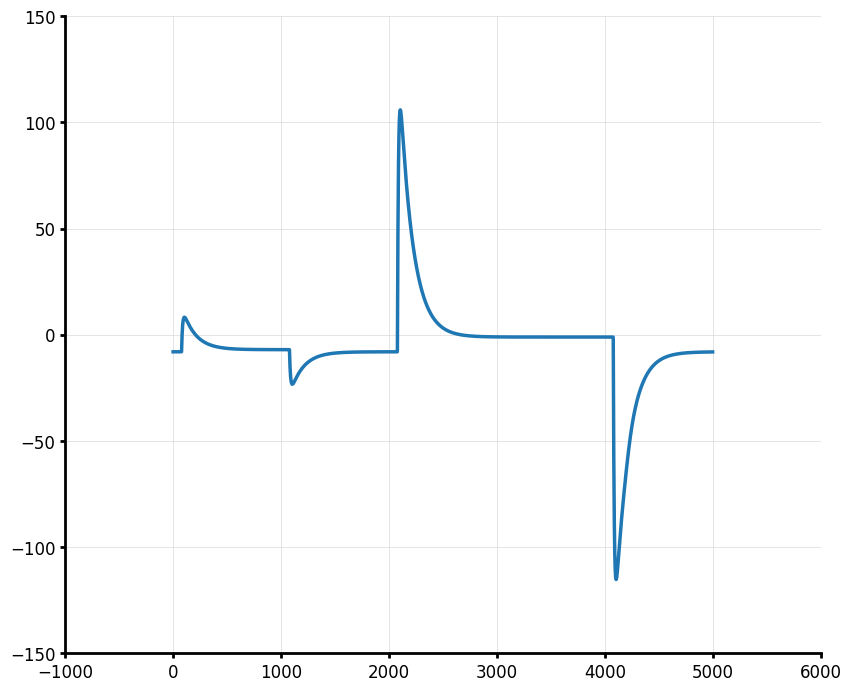

In [8]:
#               C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
p0 = np.log([6e-15, 12e-12, 5e2,  80,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])

ff = full_log(p0)
plt.figure()
plt.plot(ff)
#np.save('simulated_func',ff)
#np.save('')
#ff = np.load('../data/simulated_func.npy')
#plt.plot(ff)

In [9]:
#np.load('../data/time.npy')

In [10]:
data = pd.read_csv('../data/training/2020_12_19_0035 I-V INa 11,65 pF.atf' ,delimiter= '\t', header=None, skiprows = 11)

In [ ]:
#                C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
#p0 = np.array([6e-15, 12e-12, 5e3,  8,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])
#log_p0 = np.log(p0)
p0 = np.array([6e-15, 12e-12, 5e2,  80,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])

log_p0 = np.log(p0)

#           C_f     C    a0_m   b0_m    delta_m   s_m    a0_h   b0_h   delta_h  s_h      R    R_f   g_max g_leak
bounds = ([1e-20, 1e-13, 1e-10, 1e-10,  1e-10,   1e-10,  1e-10, 1e-10, 1e-10,   1e-10,  1e6,  1e5,  1e-5, 1e-5],
          [1e-9,  1e-10, 1e8,   1e6,    1,       1e4,    1e8,   1e8,   1,       1e8,    1e15, 1e15, 1e5,  1e5])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))


data_count =  data[14]# - np.mean(data[14][:78])#current_2020_1219_0035[10]


result = scop.curve_fit(full_log,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)
#result = scop.curve_fit(broken,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
plt.legend()

#np.save('real_res_ff', result[0])

In [ ]:
#data2020_1219_0035 = pd.read_csv('/home/nik/Documents/comparison/19122020/2020_12_19_0035 I-V INa 11,65 pF.atf' ,delimiter= '\t', header=None, skiprows = 11)

#(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C,R_f, C_f , g_max)
#p0 = np.log(np.array([6e-13,11.6e-12,5e3,8,0.85,6,2,4e4,0.5,6,500e6,5e6,5e1]))
#ff = full_log(np.array(time), *p0)

#plt.plot(data2020_1, data2020_1219_0035[10])

In [ ]:
#               C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
#p0 = np.array([6e-15, 12e-12, 5e2,  80,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])

p_bas = np.array([1e-14,40e-12,100,3,0.4,12,8,4000,0.9,10,5e6,5e8,70,0.1])
bas = np.log(p_bas)

In [ ]:
full_log_fit(bas)

In [ ]:
minimizer_kwargs = {"method": "BFGS"}
ret = scop.basinhopping(full_log_fit,x0 = bas,minimizer_kwargs=minimizer_kwargs,niter=200)
ret


In [ ]:
scop.rosen

In [ ]:
#time = np.load('time.npy')
p0 = np.array([1e-16,40e-12,100,30,0.4,12,8,400,0.9,10,5e6,500e6,7])
log_p0 = np.log(p0)
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]



bounds = [(1e-20,1e-9), 
         (1e-13,1e-10),
         (1e-20,1e80),
         (1e-30,1e6),
         (1e-20,1),
         (1e-20,1e4),
         (1e-20,1e8),
         (1e-20,1e8),
         (1e-20,1),
         (1e-20,1e8),
         (1e6,1e10),
         (1e5,1e12),
         (1e-15,1e50)]

bounds_log = [(-50, -21),
             (-30, -24),
             (-50, 185),
             (-100, 14),
             (-50, 0),
             (-50, 10),
             (-50, 20),
             (-50, 20),
             (-50, 0),
             (-50, 20),
             ( 15, 30),
             ( 15, 30),
             (-40, 120)]

result = scop.differential_evolution(full_log_fit,bounds_log)#, workers=4)

In [ ]:
data = 

In [ ]:
#                C_f     C     a0_m  b0_m  delta_m  s_m   a0_h  b0_h   delta_h  s_h      R    R_f   g_max  g_leak
p0 = np.array([6e-15, 12e-12, 5e2,  80,     0.85,   6,     2,   4e4,    0.5,     6,    5e8,   5e6,   5e1,   1e-1])
log_p0 = np.log(p0)

#          C_f     C     a0_m   b0_m    delta_m   s_m    a0_h   b0_h   delta_h  s_h      R    R_f   g_max g_leak
bounds = ([1e-20, 1e-13, 1e-10, 1e-10,  1e-10,   1e-10,  1e-10, 1e-10, 1e-10,   1e-10,  1e6,  1e5,  1e-5, 1e-5],
          [1e-9,  1e-10, 1e8,   1e6,    1,       1e4,    1e8,   1e8,   1,       1e8,    1e15, 1e15, 1e5,  1e5])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))


data_count =  data[14]# - np.mean(data[14][:78])#current_2020_1219_0035[10]


result = scop.curve_fit(broken,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)
#result = scop.curve_fit(broken,time,data_count,p0 = log_p0,  bounds = log_bounds, maxfev = 1e10)

plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max','g_leak'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
           #['C_p','C_m','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R_m','R_p','g_max', 'g_leak']
plt.legend()


In [ ]:
#(t,a0_m=5e3,b0_m=8,delta_m=0.85,s_m=-5,a0_h=2,b0_h=4e4,delta_h=0.5,s_h=4, R = 500e6,C = 11.6e-12,C_f = 6e-15, g_max=1e3)
#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,50e6,6e-15,5e3])
#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e6,6e-13,5e3])
p0 = np.array([1e-16,40e-12,100,30,0.4,12,8,400,0.9,10,5e6,500e6,7])
log_p0 = np.log(p0)
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
bounds = ([1e-20,1e-13,1e-20,1e-30,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e6,1e5,1e-15],[1e-9,1e-10,1e80,106,1,1e4,1e8,1e8,1,1e8,1e10,1e12,1e50])


#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e3])
#log_p0 = np.log(p0)
data =  data2020_1219_0035[10] - np.mean(data2020_1219_0035[10][:78])#current_2020_1219_0035[10]
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
#bounds = ([1e-20,1e-20,1e-4,1e-20,1e-20,1e-20,1e-4,1e-20,1e6,1e-13,1],[1e10,1e6,1,1e4,1e8,1e8,1,1e8,1e10,1e-10,1e6])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))

result = scop.curve_fit(full_log_fit,time,ff,p0 = log_p0,  bounds = log_bounds)#, maxfev = 1e10)

plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
plt.legend()